In [ ]:
## Viewing the Spindle Galaxy (NGC-5866) using its .FITS file.

In [1]:
# Importing necessary libaries/modules
import numpy as np
import matplotlib.pyplot as mp
from astropy.io import fits

In [2]:
# To open the .fits file and make it ready for use
NGC=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/NGC 5866/frame-u-006122-1-0013.fits')

In [3]:
NGC     #This and following cells are just checks

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000026FB937AE80>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000026FBB7014C0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000026FBB701670>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000026FBBEAE250>]

In [4]:
NGC.info()

Filename: F:/Uni/Sem 1/Club Work/AstroClub/Observational/NGC 5866/frame-u-006122-1-0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [5]:
NGC[0]

In [7]:
NGC[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4653187206.63 / 1st row Number of seconds since Nov 17 1858    
RA      =            225.35840 / 1st row RA of telescope boresight (deg)        
DEC     =            56.733120 / 1st row Dec of telescope boresight (degrees)   
SPA     =              51.712  / 1st row Cam col position angle wrt N (deg)     
IPA     =             247.48

In [8]:
NGC[1].header

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
BITPIX  =                  -32 /                                                
NAXIS   =                    1 /                                                
NAXIS1  =                 2048 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                

In [9]:
NGC[2].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =               210756 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    3 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [10]:
data = NGC[0].data
data.shape

(1489, 2048)

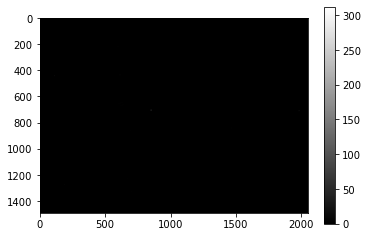

In [11]:
# To check the colourbar of the fits file in normal mapping
mp.imshow(data, cmap="gray")
mp.colorbar()

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

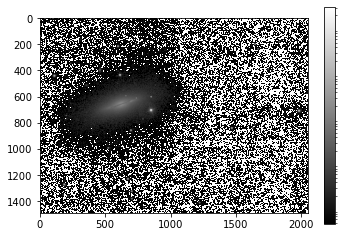

In [12]:
# Since normal mapping did not give any clear picture, we switch to lognormal distribution, for which the results are much more profound
from matplotlib.colors import LogNorm

mp.imshow(data, cmap='gray', norm=LogNorm())
cbar = mp.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [13]:
from astropy.visualization import make_lupton_rgb

In [14]:
NGCu=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/NGC 5866/frame-u-006122-1-0013.fits')
NGCg=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/NGC 5866/frame-g-006122-1-0013.fits')
NGCr=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/NGC 5866/frame-r-006122-1-0013.fits')
NGCi=fits.open('F:/Uni/Sem 1/Club Work/AstroClub/Observational/NGC 5866/frame-i-006122-1-0013.fits')

In [15]:
g=NGCg[0].data
r=NGCr[0].data
u=NGCu[0].data
i=NGCi[0].data

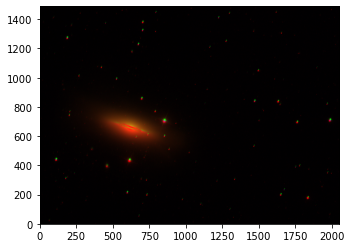

In [16]:
rgb_default = make_lupton_rgb(i,g,u,stretch=2.5,Q=10)

mp.imshow(rgb_default, origin='lower')
#plt.savefig('iguM42.jpg')

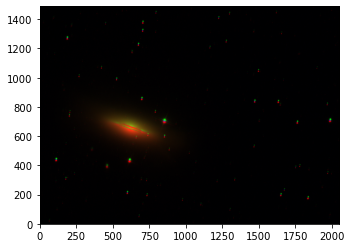

In [17]:
rgb_default = make_lupton_rgb(r,g,u,stretch=2.5,Q=10)

mp.imshow(rgb_default, origin='lower')
#plt.savefig('iguM42.jpg')

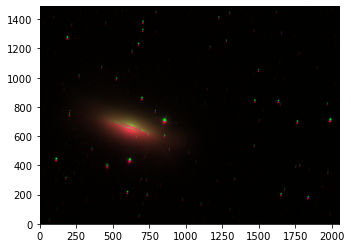

In [30]:
rgb_default = make_lupton_rgb(r*2,g*2,i/2,stretch=2.5,Q=10)

mp.imshow(rgb_default, origin='lower')
#plt.savefig('iguM42.jpg')

In [ ]:
## make_lupton_rgb is a function taken from the AstroPy library whose purpose is to generate a plot of the rgb image by using 
## three numpy nd arrays, each containing the colour coding for red, green, and blue respectively (the three filters).
## Addtionally, these ndarrays can be scaled up or down to vary the intensity of the respective colour codes.
## Stretch parameter of this functions varies the brightness of the generated image
## Important to note is that make_lupton_rgb just generates the image, but not display. For displaying it, we use imshow().
## Also present as a comment is a line to save the final image as a .jpg file on the system. We can alter the path and save
## the file at any location that we want to, for which I have kept it as a comment line.